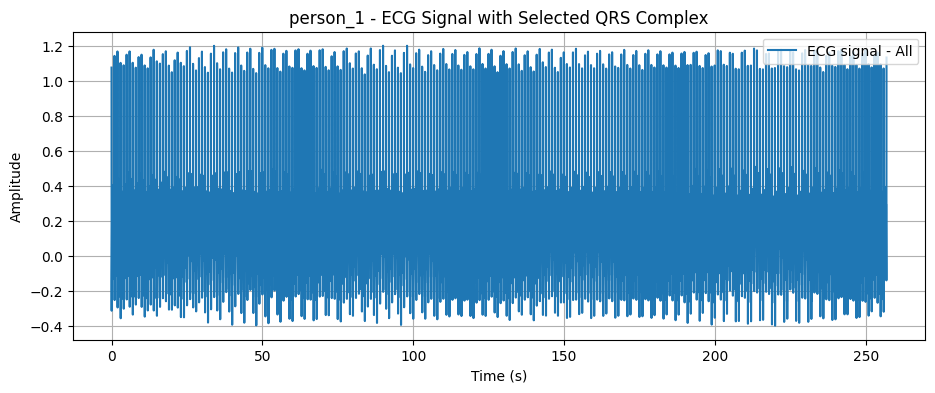

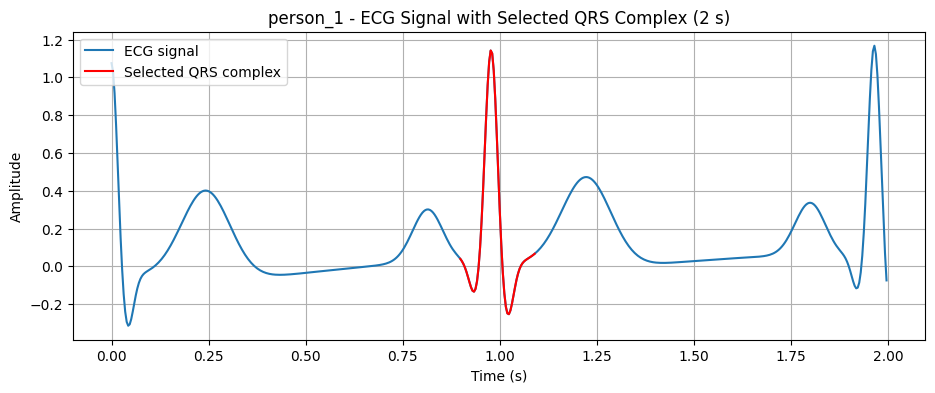

Heart Rate for person_1: 60.06 BPM


In [123]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from ecgdetectors import Detectors
from typing import Any


class Solution:

    def __init__(self, ecg_array: np.array, location: Path, index: int, custom_name: str, custom_frequency=None):
        self.ecg_values = ecg_array[:, index]
        
        self.fs = len(self.ecg_values) / ecg_array[-1][0] if custom_frequency is None else custom_frequency
        self.location = location
        self.custom_name = custom_name

    # task 1 - detect QRS Complexes
    def build_graph_all_time(self, to_image=False):
        """

        """
        time_plot = np.arange(len(self.ecg_values)) / self.fs
        # Plotting - visualization
        plt.figure(figsize=(11, 4))
        plt.plot(time_plot, self.ecg_values, label='ECG signal - All')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title(f'{self.custom_name} - ECG Signal with Selected QRS Complex')
        plt.legend()
        plt.grid(True)
        plt.savefig(self.location / f'graph_all_{self.custom_name}.png') if to_image else plt.show()

    # task 1 - detect QRS Complexes
    def build_graph_in_specific_time_range(self, plot_duration: int, q_location: int, s_location: int, to_image=False) -> Any:
        """
        Building a plot with time (x) and amplitude (y) in the specific time range.
        Explanations are commented.

        :param plot_duration: the duration of plot in seconds
        :param q_location: the index of Q wave in np.array()
        :param s_location: the index of S wave in np.array()
        """
        
        # Calculate the number of sample by multiplying seconds by frequency
        num_samples = int(plot_duration * self.fs)

        # Start index can be adjusted (0 by default)
        start_index = 0

        # Must be start_index + num_samples (0+num_samples by default)
        end_index = start_index + num_samples

        # Slice the np.array from start to end indices
        # f.e. [0.12 0.23 0.54 0.13 0.76 ... 0.56]; len(array) = 512
        # it builds 512 dots laid on the y axe
        ecg_plot = self.ecg_values[start_index:end_index]

        # The array of time values divided by frequency
        # f.e. [0 1 2 3 4 ...  512] / fs (256 Hz); len(array) = 512
        # it builds 512 dots laid on the x axe
        time_plot = np.arange(num_samples) / self.fs

        # NOTE: the ecg_plot and time_plot length should be the same to keep 2D dimension logic

        # Plotting - visualization
        plt.figure(figsize=(11, 4))
        plt.plot(time_plot, ecg_plot, label='ECG signal')

        # Highlight QRS complex
        plt.plot(time_plot[q_location:s_location], self.ecg_values[q_location:s_location], color='red',
                 label='Selected QRS complex')
        
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title(f'{self.custom_name} - ECG Signal with Selected QRS Complex ({plot_duration} s)')
        plt.legend()
        plt.grid(True)
        plt.savefig(self.location / f'graph_specific_time_{plot_duration}_s_{self.custom_name}.png') if to_image else plt.show()

    @staticmethod
    def detect_qrs_complex_using_pan_tompkins(ecg: np.array, fs_val: int) -> np.array:
        """
        Return QRS Complexes using open-source `ecgdetectors` module. R-Peak detection.
        TO INSTALL: pip install py-ecg-detectors
        """
        return Detectors(fs_val).pan_tompkins_detector(ecg)

    #  task 2 - measure heart rate
    def calculate_heart_rate(self) -> float:
        """
        Calculate Heart Rate.
        Return heart rate (in float) by dividing 60 by the mean of distances between peaks (converted to ms)
        Explanations are commented.

        """
        # Finds the QRS peaks (literally R peaks detection)
        qrs_peaks = self.detect_qrs_complex_using_pan_tompkins(self.ecg_values, self.fs)
        
        # Calculate RR Intervals - distance between two adjacent peaks (np.diff) and divide by frequency
        rr_intervals = np.diff(qrs_peaks) / self.fs
        # Find the average of RR intervals (np.mean)
        average_rr_interval = np.mean(rr_intervals)
        # Divide by 60 (per minute convention)
        hr = 60 / average_rr_interval

        # Print Heart rate with 2 place decimal value in BPM
        print(f"Heart Rate for {self.custom_name}: {round(hr, 2)} BPM")
        return hr
    
def refactor_time_column(file_ref: Path):
    with open(file_ref, 'r') as file:
        lines = file.readlines()

# Modify the values in the first column
    modified_lines = []
    for line in lines:
        parts = line.split('\t')
        time_parts = parts[0].split(':')
        modified_time = f'{float(time_parts[-1]):.3f}'
        modified_line = f'{modified_time} {parts[1]} {parts[2]}'
        modified_lines.append(modified_line)
    
    modified_file = file_ref.parent / f'{file_ref.stem}_updated.dat'
    # Save the modified file
    with open(modified_file, 'w') as file:
        file.writelines(modified_lines)
    return modified_file
    


if __name__ == '__main__':
    location = Path(r'C:\Users\kerim\Desktop\DSP\ecg_data')
    
    file_1_path = 'https://raw.githubusercontent.com/rustamPy/notes/main/person_1.dat'
    file_2_path = 'https://raw.githubusercontent.com/rustamPy/notes/main/person_2.dat'
    file_3_path = 'https://raw.githubusercontent.com/rustamPy/notes/main/person_3_updated.dat'
    file_4_path = 'https://raw.githubusercontent.com/rustamPy/notes/main/person_4_updated.dat'
    
    raw_file_1 = np.loadtxt(file_1_path)
    raw_file_2 = np.loadtxt(file_2_path)
    raw_file_3 = np.loadtxt(file_3_path)
    raw_file_4 = np.loadtxt(file_4_path)
    
    person_1 = Solution(raw_file_1, location, 1, 'person_1')
    person_1.build_graph_all_time(True)
    person_1.build_graph_in_specific_time_range(2, 230, 280)
    person_1.calculate_heart_rate()
    


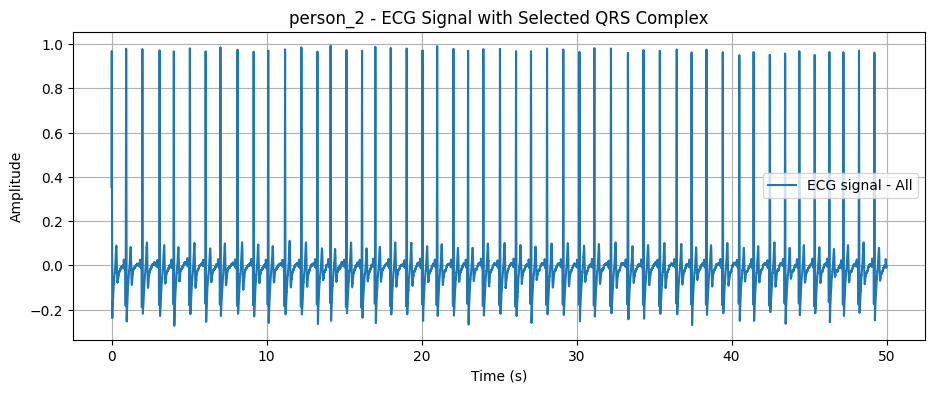

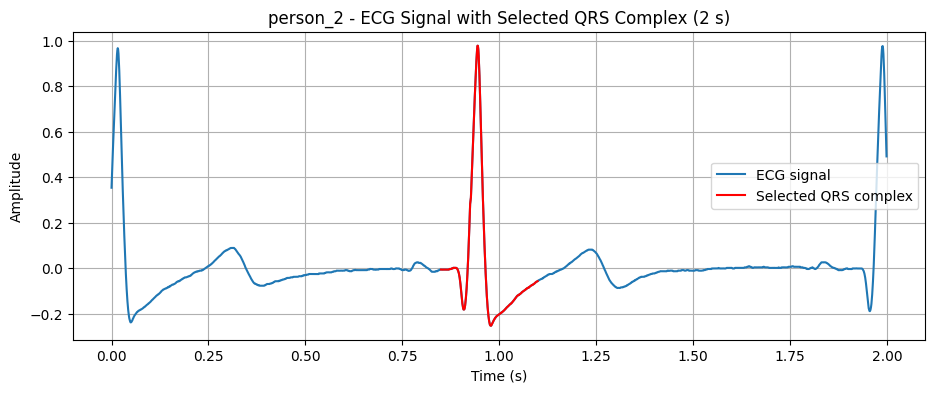

Heart Rate for person_2: 61.29 BPM


61.28702757916242

In [124]:
person_2 = Solution(raw_file_2, location, 1, 'person_2', custom_frequency=1000)
person_2.build_graph_all_time(to_image=True)
person_2.build_graph_in_specific_time_range(2, 850, 1100)
person_2.calculate_heart_rate()

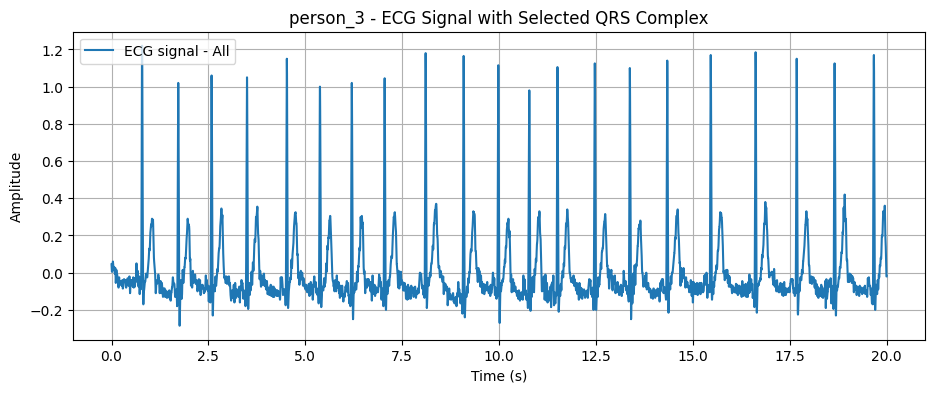

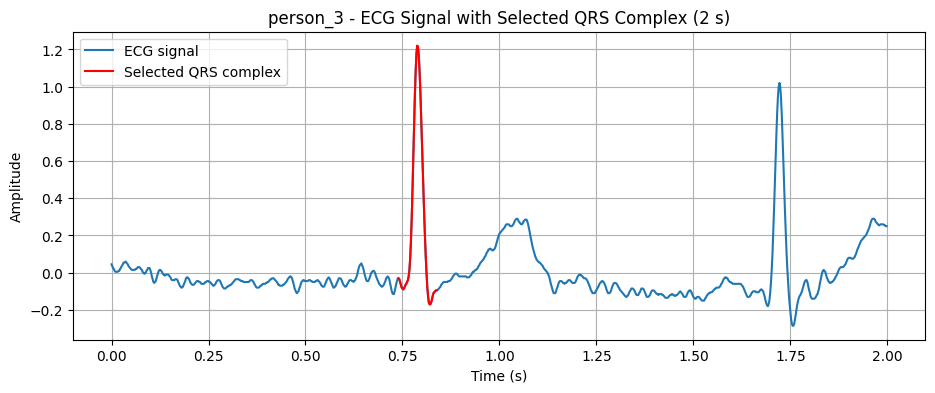

Heart Rate for person_3: 64.77 BPM


64.77464853507041

In [125]:
person_3 = Solution(raw_file_3, location, 2, 'person_3')
person_3.build_graph_all_time(to_image=True)
person_3.build_graph_in_specific_time_range(2, 370, 420)
person_3.calculate_heart_rate()

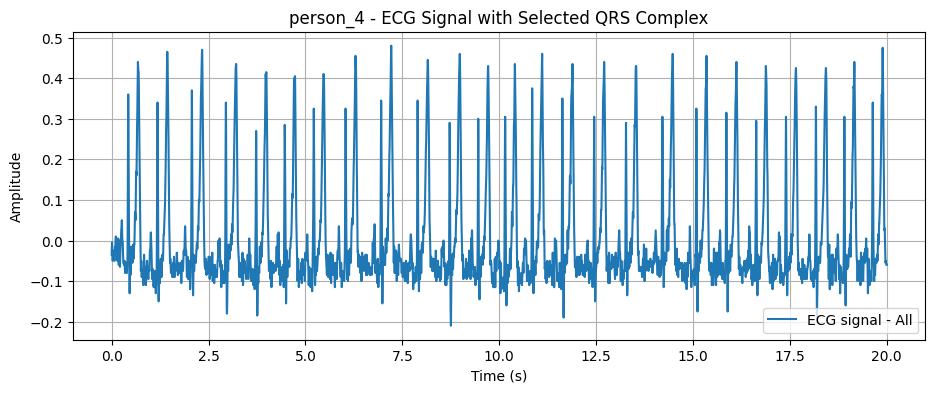

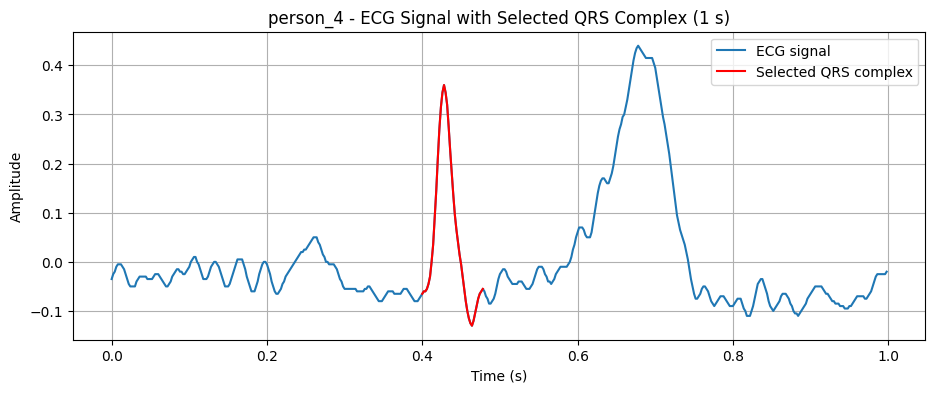

Heart Rate for person_4: 148.96 BPM


148.95986909406702

In [126]:
person_4 = Solution(raw_file_4, location, 2, 'person_4')
person_4.build_graph_all_time(to_image=True)
person_4.build_graph_in_specific_time_range(1, 200, 240)
person_4.calculate_heart_rate()